### EDA con target

Vemos el comportamiento de las variables con respecto al target

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",40)
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("path_a_los_datos" , sep = "|")


#### Analisis del target


In [13]:
df["target"].value_counts()

0    707198
1    260142
Name: target, dtype: int64

In [14]:
df["target"].value_counts(normalize=True)

0    0.731075
1    0.268925
Name: target, dtype: float64

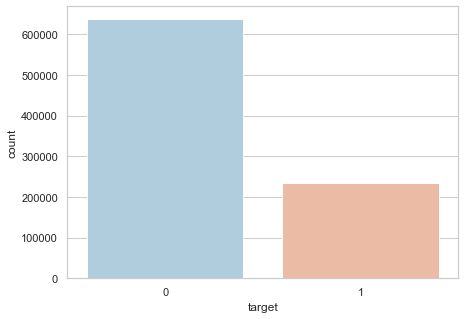

In [3]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x="target",data=df,palette='RdBu_r')

#### Analisis bivariables con respecto al target
Vamos a analizar el comportamiento de variables categoricas respecto al target

Text(0, 0.5, 'Cantidad de clientes')

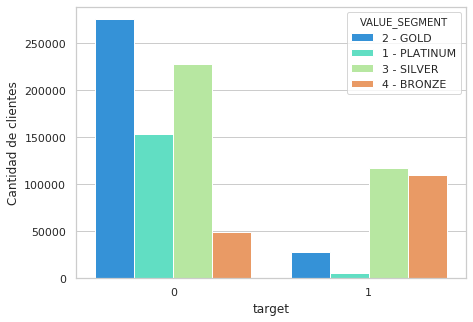

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x='target', hue='VALUE_SEGMENT', data=df, palette='rainbow')
plt.ylabel('Cantidad de clientes')

# podemos ver que no hay muchos clientes platinum o gold que abandonen el servicio.
# es un detalle importante para la descripcion del comportamiento del target


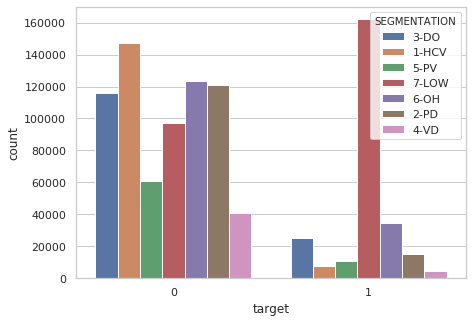

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x='target', hue='SEGMENTATION', data=df)

# no deja patrones claros

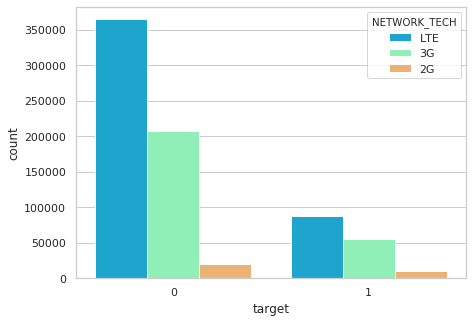

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(x='target', hue='NETWORK_TECH', data=df, palette='rainbow')

# vemos comportamientos parecidos, no se ve una diferenciacion entre los clientes que se van y los que se quedan
# no nos va a servir esta columna

#### Correlaciones con el target

In [27]:
# covertimos variables categoricas de interes a numericas

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df["VALUE_SEGMENT"])
df["VALUE_SEGMENT_encoded"] = le.transform(df["VALUE_SEGMENT"])

le.fit(df["SEGMENTATION"])
df["SEGMENTATION_encoded"] = le.transform(df["SEGMENTATION"])

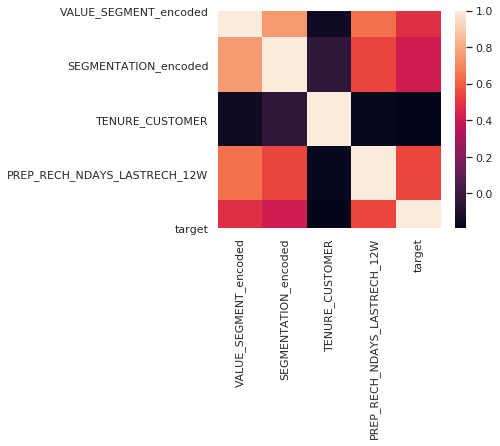

In [78]:
# correlacion entre algunas variables relevantes con el target

lista_col = ["VALUE_SEGMENT_encoded","SEGMENTATION_encoded","TENURE_CUSTOMER",
             'PREP_RECH_NDAYS_LASTRECH_12W' ,"target"]

df_corr = df[lista_col].corr()

plt.figure(figsize=(5,4))
sns.heatmap(df_corr)

# vemos que las variables VALUE_SEGMENT_encoded y SEGMENTATION_encoded estan muy correlacionadas
# vamos a usar VALUE_SEGMENT_encoded para el entrenamiento del modelo

In [81]:
# para una mayor descripcion vemos especificamente las correlaciones con el target
df_corr["target"].abs().sort_values(ascending=False)

target                          1.000000
PREP_RECH_NDAYS_LASTRECH_12W    0.541846
VALUE_SEGMENT_encoded           0.479897
SEGMENTATION_encoded            0.419150
TENURE_CUSTOMER                 0.188974
Name: target, dtype: float64

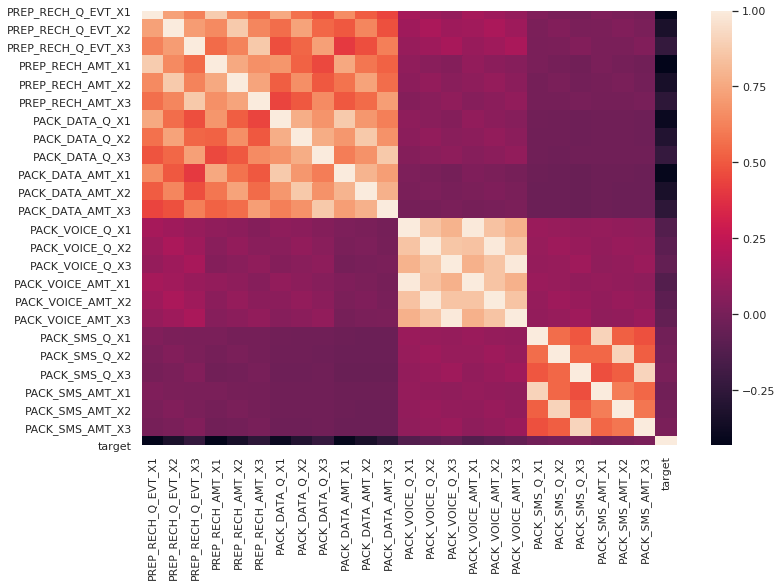

In [83]:
# correlacion entre datos mensuales y el target

lista_col = ['PREP_RECH_Q_EVT_X1','PREP_RECH_Q_EVT_X2','PREP_RECH_Q_EVT_X3','PREP_RECH_AMT_X1','PREP_RECH_AMT_X2',
             'PREP_RECH_AMT_X3','PACK_DATA_Q_X1','PACK_DATA_Q_X2','PACK_DATA_Q_X3','PACK_DATA_AMT_X1',
             'PACK_DATA_AMT_X2',
             'PACK_DATA_AMT_X3','PACK_VOICE_Q_X1','PACK_VOICE_Q_X2','PACK_VOICE_Q_X3',
             'PACK_VOICE_AMT_X1','PACK_VOICE_AMT_X2','PACK_VOICE_AMT_X3','PACK_SMS_Q_X1','PACK_SMS_Q_X2',
             'PACK_SMS_Q_X3','PACK_SMS_AMT_X1','PACK_SMS_AMT_X2',
             'PACK_SMS_AMT_X3' ,"target"]

df_corr = df[lista_col].corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_corr)

In [87]:
# para una mayor descripcion vemos especificamente las correlaciones con el target
# tomamos como campos a tener en cuenta a aquellos que tengan un valor absoluto de correlacion mayot a 0.20
mask = df_corr["target"].abs() >= 0.20
df_corr["target"][mask].abs().sort_values(ascending=False)

# no encontramos significativas las variables de pack de voz ni de sms.

target                1.000000
PREP_RECH_AMT_X1      0.432070
PREP_RECH_Q_EVT_X1    0.430174
PACK_DATA_AMT_X1      0.412048
PACK_DATA_Q_X1        0.389638
PREP_RECH_AMT_X2      0.341622
PACK_DATA_AMT_X2      0.333678
PREP_RECH_Q_EVT_X2    0.327940
PACK_DATA_Q_X2        0.303383
PACK_DATA_AMT_X3      0.262676
PREP_RECH_AMT_X3      0.259208
PREP_RECH_Q_EVT_X3    0.235728
PACK_DATA_Q_X3        0.228377
Name: target, dtype: float64

In [89]:
# correlacion entre datos semanales y el target

lista_col = ['PREP_RECH_Q_EVT_W1','PREP_RECH_Q_EVT_W2','PREP_RECH_Q_EVT_W3','PREP_RECH_Q_EVT_W4',
             'PREP_RECH_Q_EVT_W5','PREP_RECH_Q_EVT_W6','PREP_RECH_Q_EVT_W7','PREP_RECH_Q_EVT_W8',
             'PREP_RECH_Q_EVT_W9','PREP_RECH_Q_EVT_W10','PREP_RECH_Q_EVT_W11','PREP_RECH_Q_EVT_W12',
             'PREP_RECH_AMT_W1','PREP_RECH_AMT_W2','PREP_RECH_AMT_W3','PREP_RECH_AMT_W4','PREP_RECH_AMT_W5',
             'PREP_RECH_AMT_W6','PREP_RECH_AMT_W7','PREP_RECH_AMT_W8','PREP_RECH_AMT_W9','PREP_RECH_AMT_W10',
             'PREP_RECH_AMT_W11','PREP_RECH_AMT_W12','PACK_DATA_Q_W1','PACK_DATA_Q_W2','PACK_DATA_Q_W3',
             'PACK_DATA_Q_W4','PACK_DATA_Q_W5','PACK_DATA_Q_W6','PACK_DATA_Q_W7','PACK_DATA_Q_W8',
             'PACK_DATA_Q_W9','PACK_DATA_Q_W10','PACK_DATA_Q_W11','PACK_DATA_Q_W12','PACK_DATA_AMT_W1',
             'PACK_DATA_AMT_W2','PACK_DATA_AMT_W3','PACK_DATA_AMT_W4','PACK_DATA_AMT_W5','PACK_DATA_AMT_W6',
             'PACK_DATA_AMT_W7','PACK_DATA_AMT_W8','PACK_DATA_AMT_W9','PACK_DATA_AMT_W10','PACK_DATA_AMT_W11',
             'PACK_DATA_AMT_W12','PACK_VOICE_Q_W1','PACK_VOICE_Q_W2','PACK_VOICE_Q_W3','PACK_VOICE_Q_W4',
             'PACK_VOICE_Q_W5','PACK_VOICE_Q_W6','PACK_VOICE_Q_W7','PACK_VOICE_Q_W8','PACK_VOICE_Q_W9',
             'PACK_VOICE_Q_W10','PACK_VOICE_Q_W11','PACK_VOICE_Q_W12','PACK_VOICE_AMT_W1','PACK_VOICE_AMT_W2',
             'PACK_VOICE_AMT_W3','PACK_VOICE_AMT_W4','PACK_VOICE_AMT_W5','PACK_VOICE_AMT_W6','PACK_VOICE_AMT_W7',
             'PACK_VOICE_AMT_W8','PACK_VOICE_AMT_W9','PACK_VOICE_AMT_W10','PACK_VOICE_AMT_W11',
             'PACK_VOICE_AMT_W12','PACK_SMS_Q_W1','PACK_SMS_Q_W2','PACK_SMS_Q_W3','PACK_SMS_Q_W4',
             'PACK_SMS_Q_W5','PACK_SMS_Q_W6','PACK_SMS_Q_W7','PACK_SMS_Q_W8','PACK_SMS_Q_W9','PACK_SMS_Q_W10',
             'PACK_SMS_Q_W11','PACK_SMS_Q_W12','PACK_SMS_AMT_W1','PACK_SMS_AMT_W2','PACK_SMS_AMT_W3',
             'PACK_SMS_AMT_W4','PACK_SMS_AMT_W5','PACK_SMS_AMT_W6','PACK_SMS_AMT_W7','PACK_SMS_AMT_W8',
             'PACK_SMS_AMT_W9','PACK_SMS_AMT_W10','PACK_SMS_AMT_W11','PACK_SMS_AMT_W12' ,"target"]

df_corr = df[lista_col].corr()


In [92]:
# para una mayor descripcion vemos especificamente las correlaciones con el target
# tomamos como campos a tener en cuenta a aquellos que tengan un valor absoluto de correlacion mayot a 0.20
mask = df_corr["target"].abs() >= 0.20
df_corr["target"][mask].abs().sort_values(ascending=False)

# df_corr["target"][mask].abs().sort_index(ascending=False)
# no encontramos significativas las variables de pack de voz ni de sms.
# tambien vemos que las ultimas semanas no tienen tanta correlacion con el target, y por eso no salen en el 
# listado

target                1.000000
PREP_RECH_Q_EVT_W2    0.355478
PREP_RECH_AMT_W2      0.344755
PREP_RECH_Q_EVT_W1    0.339573
PACK_DATA_AMT_W2      0.335795
PACK_DATA_Q_W2        0.333299
PACK_DATA_Q_W1        0.325822
PREP_RECH_Q_EVT_W4    0.323451
PREP_RECH_AMT_W1      0.323216
PREP_RECH_AMT_W4      0.322264
PREP_RECH_Q_EVT_W3    0.313963
PACK_DATA_AMT_W1      0.313034
PREP_RECH_AMT_W3      0.310497
PACK_DATA_AMT_W3      0.309150
PACK_DATA_AMT_W4      0.305589
PACK_DATA_Q_W3        0.300762
PACK_DATA_Q_W4        0.297966
PREP_RECH_Q_EVT_W5    0.278788
PREP_RECH_AMT_W5      0.275280
PREP_RECH_AMT_W6      0.270099
PACK_DATA_AMT_W6      0.267725
PREP_RECH_Q_EVT_W6    0.265967
PACK_DATA_AMT_W5      0.264404
PACK_DATA_Q_W5        0.261341
PACK_DATA_Q_W6        0.257124
PACK_DATA_AMT_W7      0.245310
PREP_RECH_AMT_W8      0.245012
PACK_DATA_AMT_W8      0.242332
PREP_RECH_AMT_W7      0.240329
PREP_RECH_Q_EVT_W7    0.234287
PREP_RECH_Q_EVT_W8    0.233259
PACK_DATA_Q_W7        0.232813
PACK_DAT

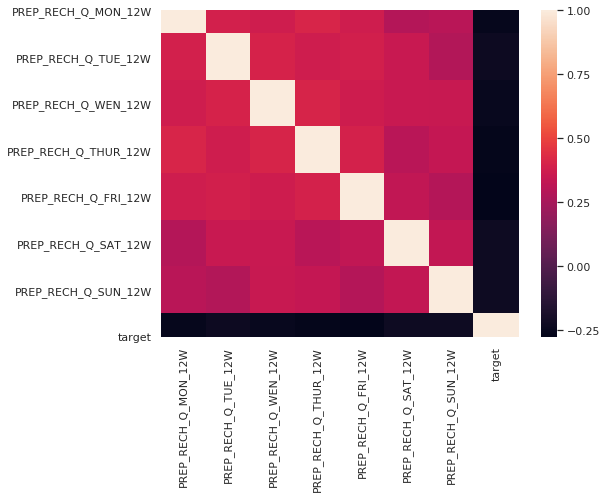

In [95]:
# correlacion entre los valores diarios acumulados y el target

lista_col = ['PREP_RECH_Q_MON_12W',
 'PREP_RECH_Q_TUE_12W',
 'PREP_RECH_Q_WEN_12W',
 'PREP_RECH_Q_THUR_12W',
 'PREP_RECH_Q_FRI_12W',
 'PREP_RECH_Q_SAT_12W',
 'PREP_RECH_Q_SUN_12W' ,"target"]

df_corr = df[lista_col].corr()

plt.figure(figsize=(8,6))
sns.heatmap(df_corr)

In [96]:
# para una mayor descripcion vemos especificamente las correlaciones con el target
# tomamos como campos a tener en cuenta a aquellos que tengan un valor absoluto de correlacion mayot a 0.20
mask = df_corr["target"].abs() >= 0.20
df_corr["target"][mask].abs().sort_values(ascending=False)

# todos son aptos, hay que decidir que hacer con estos campos
# lo mas probable es que no los tengamos en cuenta porque son mas descripciones de las recargas

target                  1.000000
PREP_RECH_Q_FRI_12W     0.275599
PREP_RECH_Q_THUR_12W    0.263702
PREP_RECH_Q_MON_12W     0.256561
PREP_RECH_Q_WEN_12W     0.248341
PREP_RECH_Q_TUE_12W     0.233480
PREP_RECH_Q_SUN_12W     0.230021
PREP_RECH_Q_SAT_12W     0.226545
Name: target, dtype: float64

##### algunas transformaciones para ver mas correlaciones

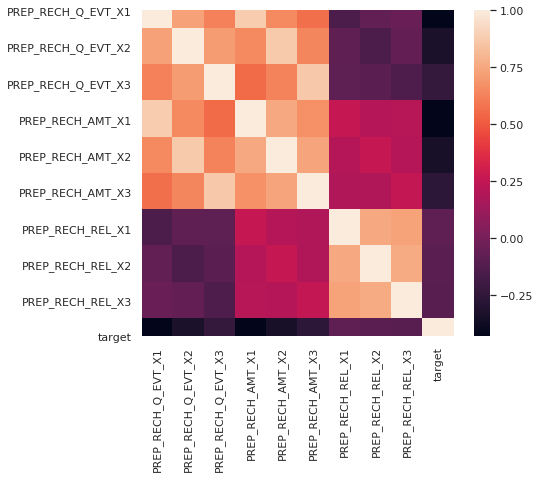

In [99]:
# como vimos cantidad y monto de recargas mensuales estan muy correlacionadas, por lo que tenemos que tomar una 
# de ellas, vamos a generar tambien 3 nuevas columnas y vamos a comparar todas las correlaciones con 
# respecto al target

df['PREP_RECH_REL_X1'] = df['PREP_RECH_AMT_X1']/df['PREP_RECH_Q_EVT_X1']
df['PREP_RECH_REL_X2'] = df['PREP_RECH_AMT_X2']/df['PREP_RECH_Q_EVT_X2']
df['PREP_RECH_REL_X3'] = df['PREP_RECH_AMT_X3']/df['PREP_RECH_Q_EVT_X3']

lista_col = ['PREP_RECH_Q_EVT_X1','PREP_RECH_Q_EVT_X2','PREP_RECH_Q_EVT_X3','PREP_RECH_AMT_X1','PREP_RECH_AMT_X2',
             'PREP_RECH_AMT_X3', 'PREP_RECH_REL_X1' ,'PREP_RECH_REL_X2' ,'PREP_RECH_REL_X3' ,"target"]

df_corr = df[lista_col].corr()

plt.figure(figsize=(7,6))
sns.heatmap(df_corr)

# vemos que el monto mensual es la variable que mejor describe al target
# PREP_RECH_AMT_X

In [98]:
df_corr["target"].abs().sort_values(ascending=False)

# las columnas construidas no tienen una correlacion significativa, para algoritmos de regresion
# no serviran, pero si pueden ser importantes para random forest

target                1.000000
PREP_RECH_AMT_X1      0.432070
PREP_RECH_Q_EVT_X1    0.430174
PREP_RECH_AMT_X2      0.341622
PREP_RECH_Q_EVT_X2    0.327940
PREP_RECH_AMT_X3      0.259208
PREP_RECH_Q_EVT_X3    0.235728
PREP_RECH_REL_X3      0.098940
PREP_RECH_REL_X2      0.093976
PREP_RECH_REL_X1      0.077414
Name: target, dtype: float64

In [ ]:
# conclusion
# vemos que el monto mensual es la variable que mejor describe al target
# PREP_RECH_AMT_X

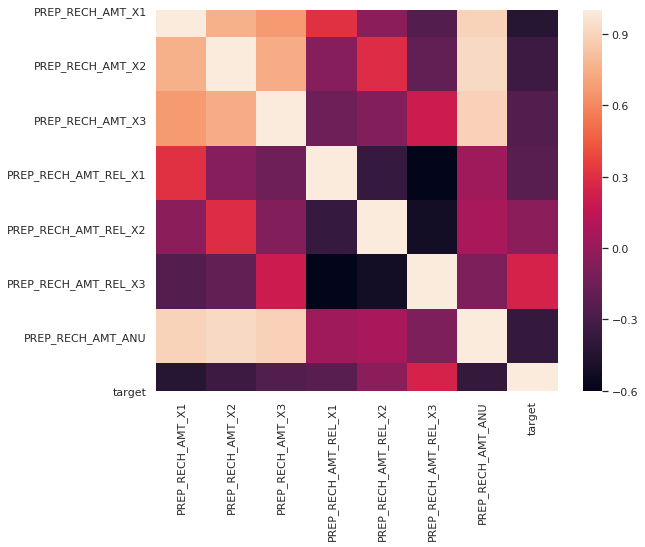

In [100]:
# cuando hables de montos, SIEMPRE dividí las features
# nunca pongas montos simples en un algoritmo
# dividí, por ejemplo, cada gasto semanal por el mensual
# o por el anual

# COLUMNA DE MONTO ANUAL
df['PREP_RECH_AMT_ANU'] = df['PREP_RECH_AMT_X1'] + df['PREP_RECH_AMT_X2'] + df['PREP_RECH_AMT_X3']

# Montos relativos por mes
df['PREP_RECH_AMT_REL_X1'] = df['PREP_RECH_AMT_X1']/df['PREP_RECH_AMT_ANU']
df['PREP_RECH_AMT_REL_X2'] = df['PREP_RECH_AMT_X2']/df['PREP_RECH_AMT_ANU']
df['PREP_RECH_AMT_REL_X3'] = df['PREP_RECH_AMT_X3']/df['PREP_RECH_AMT_ANU']

lista_col = ['PREP_RECH_AMT_X1','PREP_RECH_AMT_X2','PREP_RECH_AMT_X3', 'PREP_RECH_AMT_REL_X1',
             'PREP_RECH_AMT_REL_X2','PREP_RECH_AMT_REL_X3','PREP_RECH_AMT_ANU',"target"]

df_corr = df[lista_col].corr()

plt.figure(figsize=(9,7))
sns.heatmap(df_corr)



In [101]:
df_corr["target"].abs().sort_values(ascending=False)

target                  1.000000
PREP_RECH_AMT_X1        0.432070
PREP_RECH_AMT_ANU       0.381114
PREP_RECH_AMT_X2        0.341622
PREP_RECH_AMT_X3        0.259208
PREP_RECH_AMT_REL_X3    0.243798
PREP_RECH_AMT_REL_X1    0.228304
PREP_RECH_AMT_REL_X2    0.039488
Name: target, dtype: float64

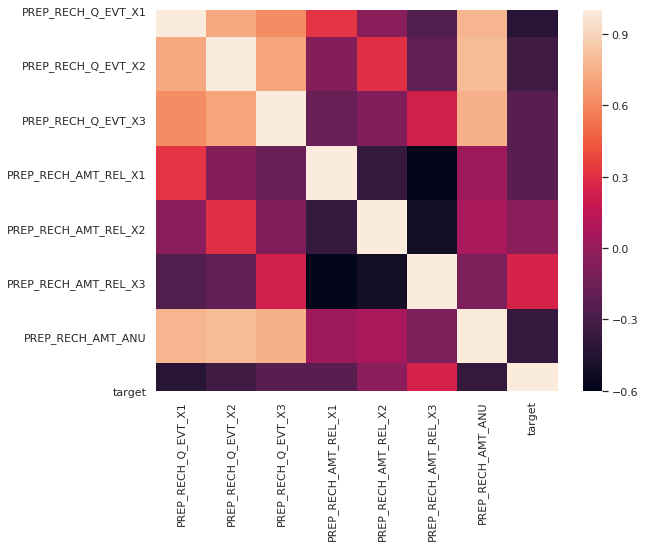

In [102]:
# hacer correlacion entre variables relativas del monto mensual y cantidad de eventos mensuales

lista_col = ['PREP_RECH_Q_EVT_X1','PREP_RECH_Q_EVT_X2','PREP_RECH_Q_EVT_X3', 'PREP_RECH_AMT_REL_X1',
             'PREP_RECH_AMT_REL_X2','PREP_RECH_AMT_REL_X3','PREP_RECH_AMT_ANU',"target"]

df_corr = df[lista_col].corr()

plt.figure(figsize=(9,7))
sns.heatmap(df_corr)

# hacer el analisis de estas correlaciones

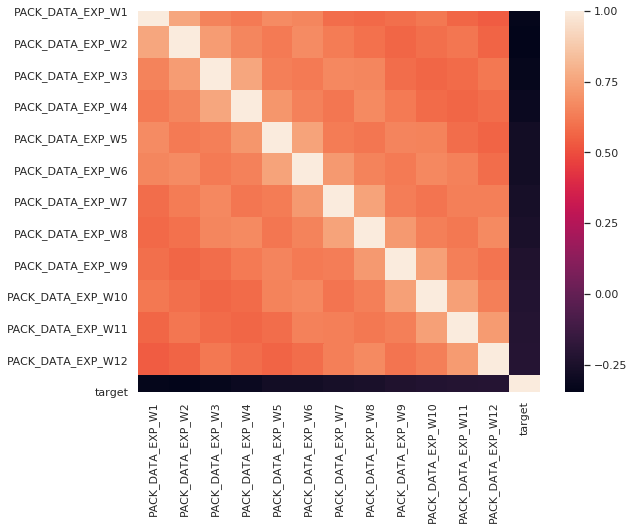

In [9]:
# correlaciones con las variables de expiracion de datos

lista_exp = re.findall("\S*DATA_EXP\S*"," ".join(df.columns.to_list()))

df_corr = df[lista_exp + ["target"]].corr()

plt.figure(figsize=(9,7))
sns.heatmap(df_corr)

# vemos una gran correlacion entre las variables y no tanta con respecto al target
# podemos generar una nueva feature que sea el promedio de la expiracion

In [10]:
df_corr["target"].abs().sort_values(ascending=False)

target               1.000000
PACK_DATA_EXP_W2     0.345455
PACK_DATA_EXP_W1     0.333507
PACK_DATA_EXP_W3     0.324948
PACK_DATA_EXP_W4     0.303648
PACK_DATA_EXP_W6     0.278970
PACK_DATA_EXP_W5     0.277872
PACK_DATA_EXP_W7     0.261855
PACK_DATA_EXP_W8     0.251431
PACK_DATA_EXP_W9     0.231663
PACK_DATA_EXP_W10    0.219744
PACK_DATA_EXP_W11    0.216594
PACK_DATA_EXP_W12    0.211164
Name: target, dtype: float64

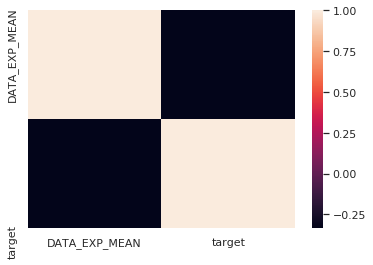

In [41]:
# creamos la nueva feature y vemos el nivel de correlacion que tiene
df["DATA_EXP_MEAN"] = (df[lista_exp].sum(axis=1)) / len(lista_exp)

df_corr = df[["DATA_EXP_MEAN","target"]].corr()
ax = sns.heatmap(df_corr)



In [42]:
df_corr["target"].abs().sort_values(ascending=False)

target           1.000000
DATA_EXP_MEAN    0.331625
Name: target, dtype: float64

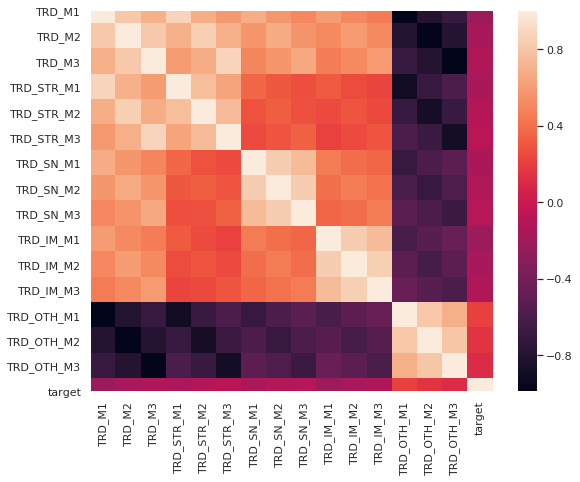

In [32]:
# correlaciones con las variables de trafico de datos

# columnas referidas al trafico de datos
lista_trd = ["TRD_M1", "TRD_M2", "TRD_M3", "TRD_STR_M1", "TRD_STR_M2", "TRD_STR_M3", "TRD_SN_M1", "TRD_SN_M2",
           "TRD_SN_M3", "TRD_IM_M1", "TRD_IM_M2", "TRD_IM_M3", "TRD_OTH_M1", "TRD_OTH_M2", "TRD_OTH_M3"]

df_corr = df[lista_trd + ["target"]].corr()

plt.figure(figsize=(9,7))
sns.heatmap(df_corr)

# vemos que hay correlacion entre los traficos de datos mensuales y los demas traficos por lo que vamos a 
# centrarnos en los trafico mensuales

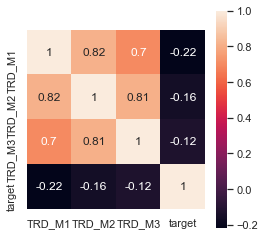

In [13]:

lista_trd = ["TRD_M1", "TRD_M2", "TRD_M3"]

df_corr = df[lista_trd + ["target"]].corr()

plt.figure(figsize=(4,4))
sns.heatmap(df_corr,annot=True , square= True)

In [48]:
df_corr["target"].abs().sort_values(ascending=False)

# no se observan valores de correlacion bajos, de todos modos se lo utilizara para hacer
# nuevas features

target    1.000000
TRD_M1    0.219836
TRD_M2    0.157613
TRD_M3    0.124194
Name: target, dtype: float64

In [ ]:
# analizamos la correlacion de las nuevas features

In [51]:
# COLUMNA mes 1 con respecto al total TRAFICO DATOS
df['TRD_REL_M1'] = df['TRD_M1']/ (df['TRD_M1'] + df['TRD_M2'] + df['TRD_M3'])
df['TRD_REL_M1'] = df['TRD_REL_M1'].fillna(0)
df['TRD_REL_M1'] = df['TRD_REL_M1'].map(lambda x: x if x != np.inf else 0)

# COLUMNA mes 2 con respecto al total TRAFICO DATOS
df['TRD_REL_M2'] = df['TRD_M2']/ (df['TRD_M1'] + df['TRD_M2'] + df['TRD_M3'])
df['TRD_REL_M2'] = df['TRD_REL_M2'].fillna(0)
df['TRD_REL_M2'] = df['TRD_REL_M2'].map(lambda x: x if x != np.inf else 0)

# COLUMNA mes 3 con respecto al total TRAFICO DATOS
df['TRD_REL_M3'] = df['TRD_M3']/ (df['TRD_M1'] + df['TRD_M2'] + df['TRD_M3'])
df['TRD_REL_M3'] = df['TRD_REL_M3'].fillna(0)
df['TRD_REL_M3'] = df['TRD_REL_M3'].map(lambda x: x if x != np.inf else 0)

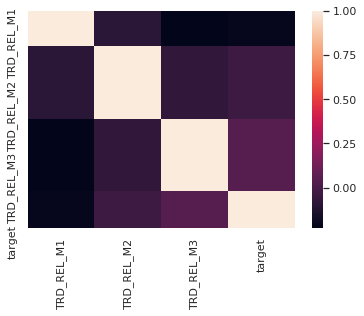

In [52]:
lista_trd = ["TRD_REL_M1", "TRD_REL_M2", "TRD_REL_M3"]

df_corr = df[lista_trd + ["target"]].corr()

sns.heatmap(df_corr)

In [53]:
df_corr

,TRD_REL_M1,TRD_REL_M2,TRD_REL_M3,target
TRD_REL_M1,1.000000,-0.095189,-0.229705,-0.215081
TRD_REL_M2,-0.095189,1.000000,-0.066428,-0.031444
TRD_REL_M3,-0.229705,-0.066428,1.000000,0.047389
target,-0.215081,-0.031444,0.047389,1.000000


#### Comparaciones con el target


Text(0.5, 1.0, 'Dias desde la ultima recarga')

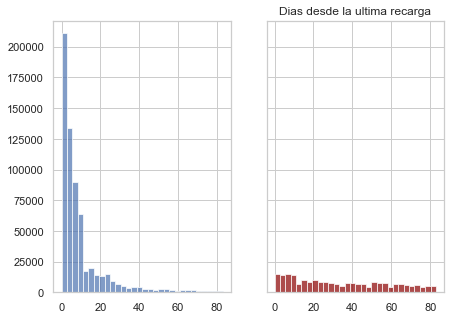

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(7,5),sharey=True)

df[df['target']==0]['PREP_RECH_NDAYS_LASTRECH_12W'].hist(bins=30,alpha=0.7,ax=axs[0])
plt.title("Dias desde la ultima recarga")

df[df['target']==1]['PREP_RECH_NDAYS_LASTRECH_12W'].hist(bins=30,color='darkred',alpha=0.7,ax=axs[1])
plt.title("Dias desde la ultima recarga")

Text(0.5, 1.0, 'Dias desde la ultima recarga')

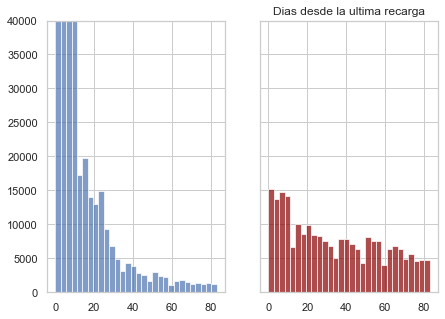

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(7,5),sharey=True)
plt.ylim(0,40000)
df[df['target']==0]['PREP_RECH_NDAYS_LASTRECH_12W'].hist(bins=30,alpha=0.7,ax=axs[0])
plt.title("Dias desde la ultima recarga")

df[df['target']==1]['PREP_RECH_NDAYS_LASTRECH_12W'].hist(bins=30,color='darkred',alpha=0.7,ax=axs[1])
plt.title("Dias desde la ultima recarga")

NameError: name 'ax' is not defined

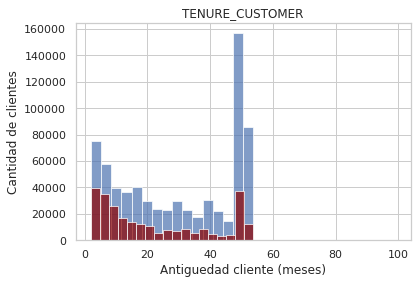

In [18]:
df[df['target']==0]['TENURE_CUSTOMER'].hist(bins=30,alpha=0.7)
df[df['target']==1]['TENURE_CUSTOMER'].hist(bins=30,color='darkred',alpha=0.7)

plt.xlabel('Antiguedad cliente (meses)')
plt.ylabel('Cantidad de clientes')
plt.title('TENURE_CUSTOMER')


# vemos que tanto los clientes que se fueron como los que se quedaron tienen comportamiento parecido con 
# respecto a la feature "TENURE_CUSTOMER"

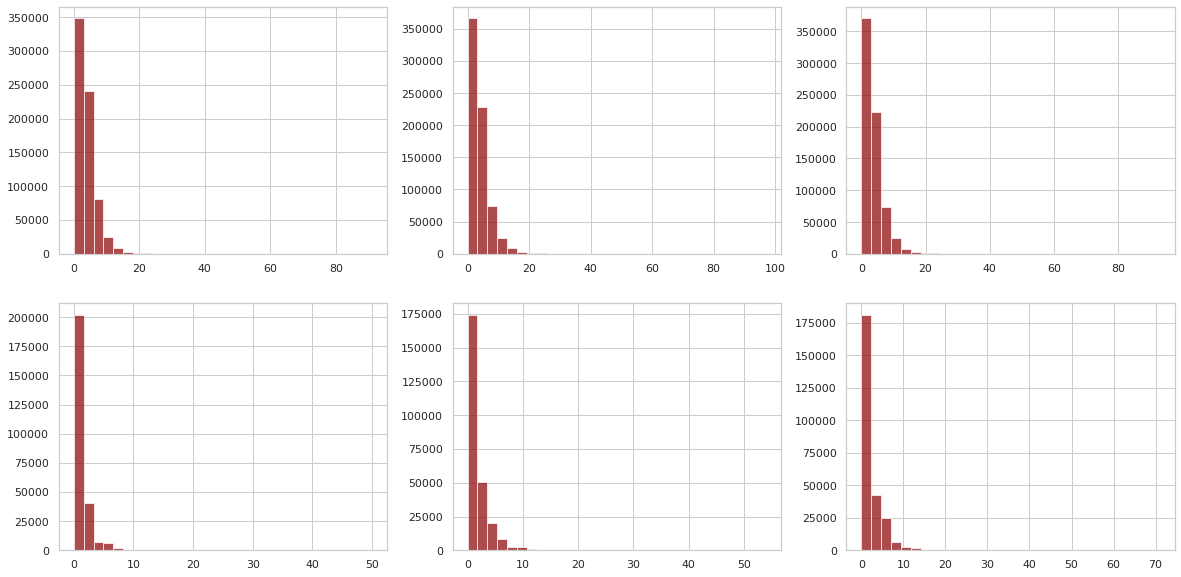

In [8]:
fig, axs = plt.subplots(2,3, figsize=(20, 10))
df[df['target']==0]['PREP_RECH_Q_EVT_X1'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,0])
df[df['target']==0]['PREP_RECH_Q_EVT_X2'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,1])
df[df['target']==0]['PREP_RECH_Q_EVT_X3'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,2])
df[df['target']==1]['PREP_RECH_Q_EVT_X1'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,0])
df[df['target']==1]['PREP_RECH_Q_EVT_X2'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,1])
df[df['target']==1]['PREP_RECH_Q_EVT_X3'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,2])

# #de acá podemos ver que los que aparacen como 1 en el target tienen 
# una cantidad de recargas por mes mucho menor a los que aparecen como 0. 
# Por lo tanto esta variable parece importante, o crear una desde esta sería ideal.

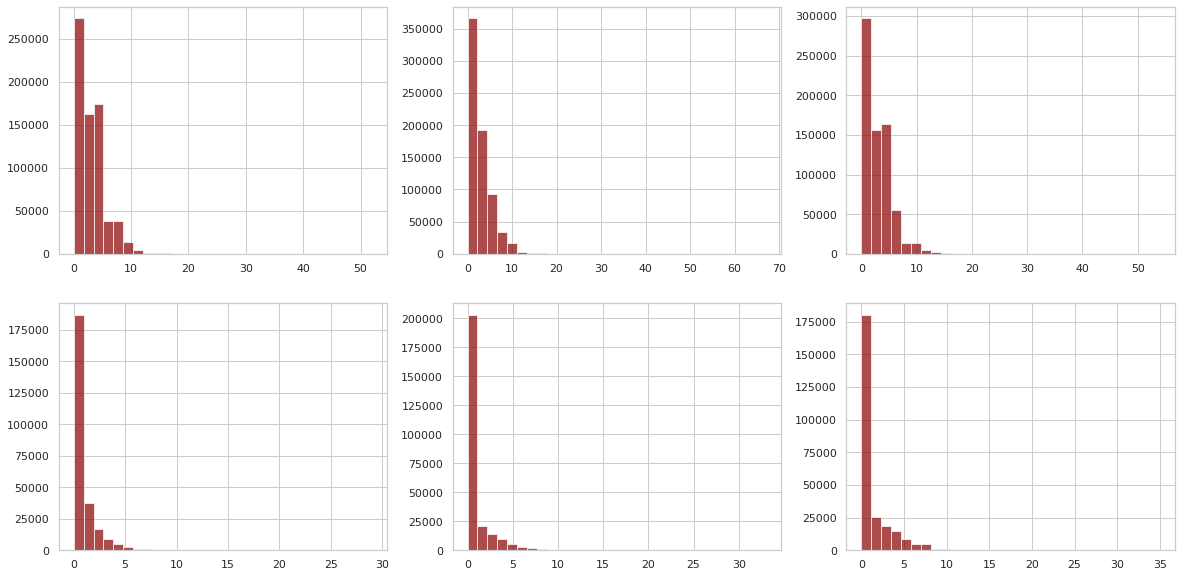

In [10]:
#veamos pack de datos!! por mes! cantidad!

fig, axs = plt.subplots(2,3, figsize=(20, 10))

df[df['target']==0]['PACK_DATA_Q_X1'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,0])
df[df['target']==0]['PACK_DATA_Q_X2'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,1])
df[df['target']==0]['PACK_DATA_Q_X3'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,2])
df[df['target']==1]['PACK_DATA_Q_X1'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,0])
df[df['target']==1]['PACK_DATA_Q_X2'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,1])
df[df['target']==1]['PACK_DATA_Q_X3'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,2])

# #claramente se ve una diferencia marcada entre los que aparecen con 
# 0 y 1 en el target a la hora de tener en cuenta la cantidad de packs de datos por mes

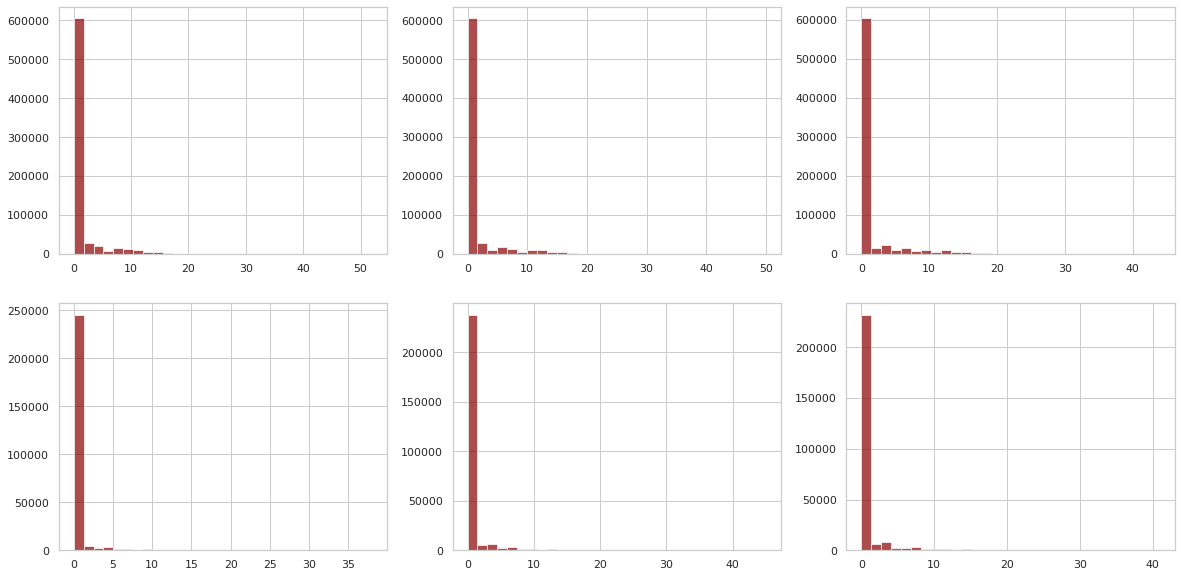

In [11]:
#veamos pack de voz!! por mes! cantidad!

fig, axs = plt.subplots(2,3, figsize=(20, 10))

df[df['target']==0]['PACK_VOICE_Q_X1'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,0])
df[df['target']==0]['PACK_VOICE_Q_X2'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,1])
df[df['target']==0]['PACK_VOICE_Q_X3'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,2])
df[df['target']==1]['PACK_VOICE_Q_X1'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,0])
df[df['target']==1]['PACK_VOICE_Q_X2'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,1])
df[df['target']==1]['PACK_VOICE_Q_X3'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,2])

#acá no se ve una difernecia marcada, tal vez se podrían tirar

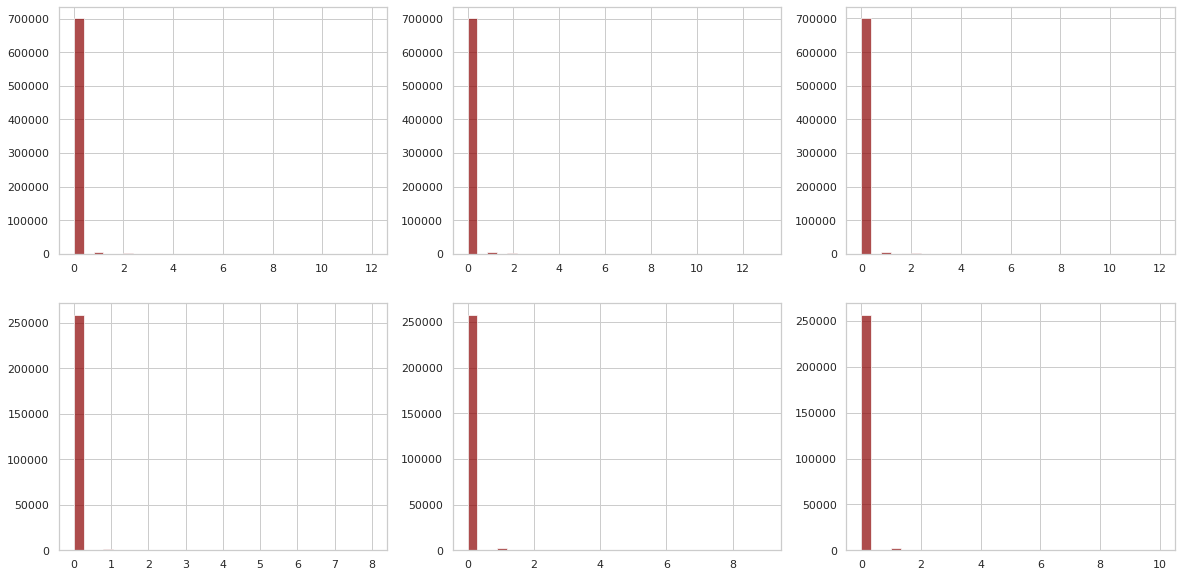

In [12]:
#veamos pack de sms!! por mes! cantidad!

fig, axs = plt.subplots(2,3, figsize=(20, 10))

df[df['target']==0]['PACK_SMS_Q_X1'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,0])
df[df['target']==0]['PACK_SMS_Q_X2'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,1])
df[df['target']==0]['PACK_SMS_Q_X3'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[0,2])
df[df['target']==1]['PACK_SMS_Q_X1'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,0])
df[df['target']==1]['PACK_SMS_Q_X2'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,1])
df[df['target']==1]['PACK_SMS_Q_X3'].hist(bins=30,color='darkred',alpha=0.7, ax=axs[1,2])
#los sms claramente no aportan

In [ ]:
# hay que hacer lo mismo con los montos, expiracion de datos, trafico de datos y


In [ ]:
# analisis para ver que hacer con los  valores nulos en NETWORK_TECH

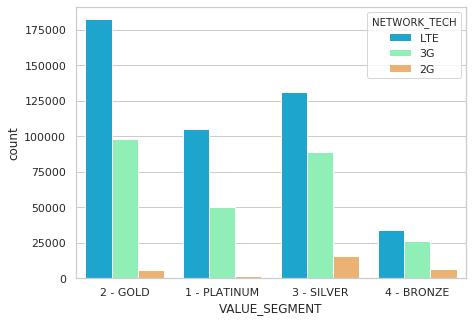

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x='VALUE_SEGMENT', hue='NETWORK_TECH', data=df, palette='rainbow')

# no se aprecia una diferencia significatica en las distribuciones, vamos a eliminar esta columna.